In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Turkish/Turkish(SKG_CDG).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,11:00:00,22:05:00,1,3,1,1,0,110,167.09
1,11:00:00,12:55:00,1,3,1,1,1,220,221.09
2,11:00:00,13:40:00,1,3,1,1,1,220,1502.08
3,09:45:00,22:05:00,2,4,1,1,0,110,167.09
4,09:45:00,09:45:00,2,4,1,1,1,220,260.09


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 9 columns):
departure_time      1764 non-null object
arrival_time        1764 non-null object
days_before         1764 non-null int64
day_of_week         1764 non-null int64
num_of_luggage      1764 non-null int64
num_of_stops        1764 non-null int64
overnight_flight    1764 non-null int64
Class               1764 non-null int64
price               1764 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 124.2+ KB


In [7]:
df.shape

(1764, 9)

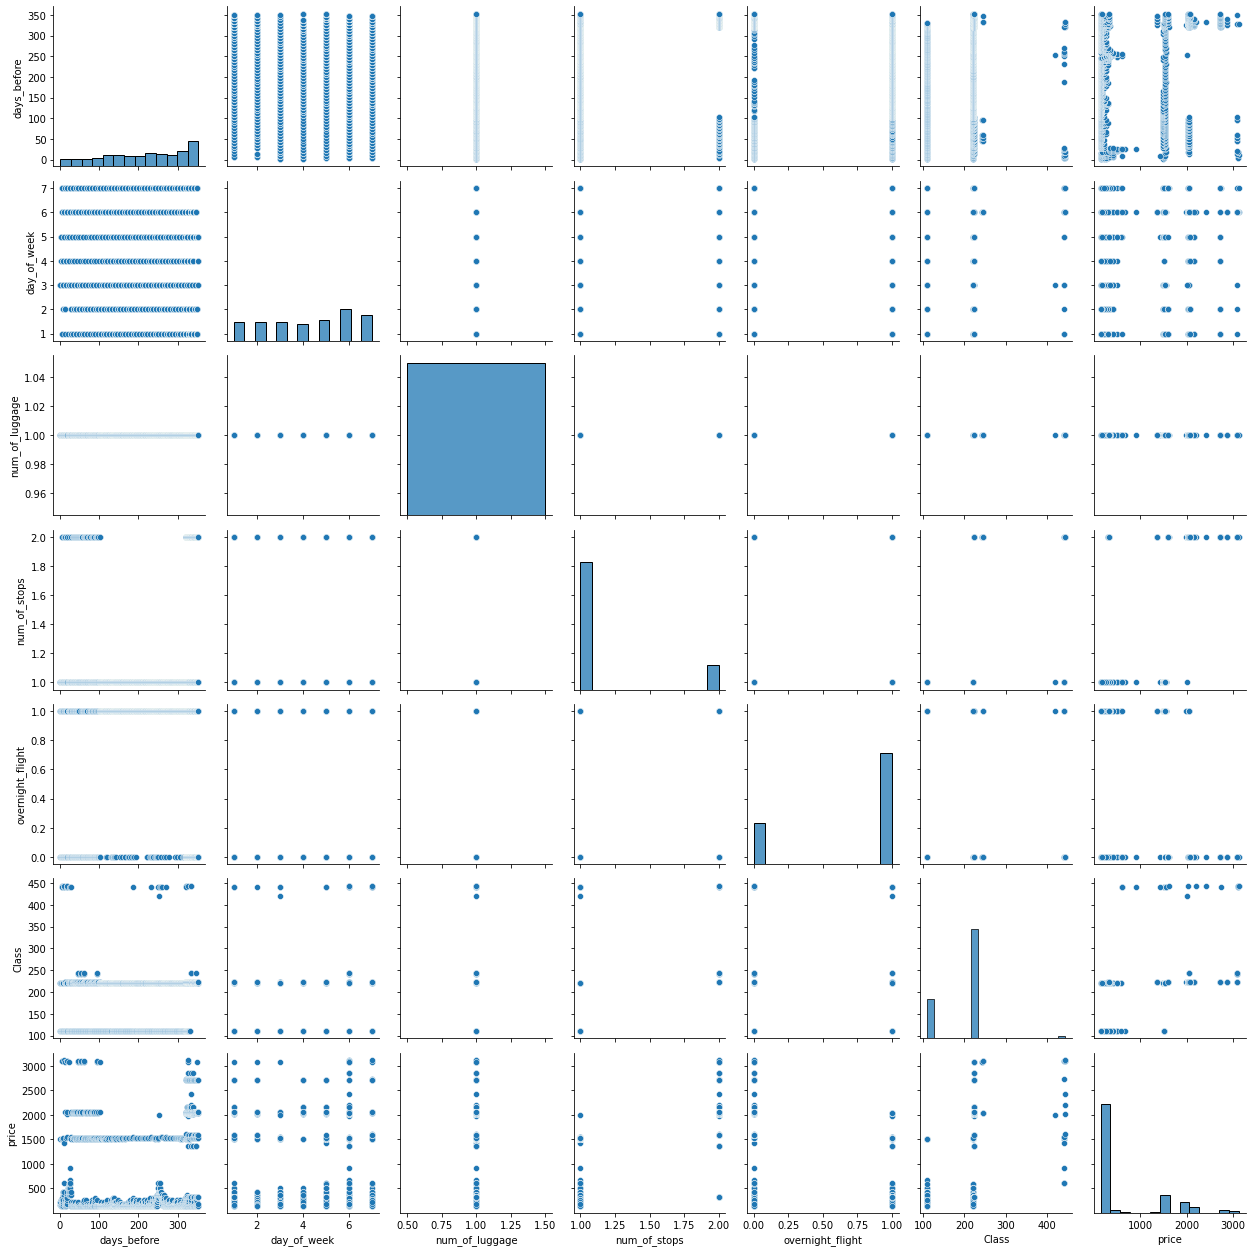

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 11:00:00,1900-01-01 22:05:00,1,3,1,1,0,110,167.09
1,1900-01-01 11:00:00,1900-01-01 12:55:00,1,3,1,1,1,220,221.09
2,1900-01-01 11:00:00,1900-01-01 13:40:00,1,3,1,1,1,220,1502.08
3,1900-01-01 09:45:00,1900-01-01 22:05:00,2,4,1,1,0,110,167.09
4,1900-01-01 09:45:00,1900-01-01 09:45:00,2,4,1,1,1,220,260.09


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 11:00:00,1900-01-01 22:05:00,1,3,1,1,0,110,167.09,-2208949200000000000,-2208909300000000000
1,1900-01-01 11:00:00,1900-01-01 12:55:00,1,3,1,1,1,220,221.09,-2208949200000000000,-2208942300000000000
2,1900-01-01 11:00:00,1900-01-01 13:40:00,1,3,1,1,1,220,1502.08,-2208949200000000000,-2208939600000000000
3,1900-01-01 09:45:00,1900-01-01 22:05:00,2,4,1,1,0,110,167.09,-2208953700000000000,-2208909300000000000
4,1900-01-01 09:45:00,1900-01-01 09:45:00,2,4,1,1,1,220,260.09,-2208953700000000000,-2208953700000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,3,1,1,1,0,110,167.09
1,3,1,1,1,1,220,221.09
2,3,1,1,1,1,220,1502.08
3,4,2,1,1,0,110,167.09
4,4,2,1,1,1,220,260.09


In [21]:
df.to_csv('skg_cdg_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [55]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.738930013293766


In [56]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8304295451061463


In [57]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8339371157943191


In [58]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8341479380155687


In [59]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7655383544318323


In [60]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8341501079966505


In [61]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.2860189471834522


In [62]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5843759802406117


In [63]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
45/45 [==============================] - 3s 7ms/step - loss: 358979.1250 - val_loss: 2210495.7500
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 245116.7969 - val_loss: 2257064.2500
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 244629.4844 - val_loss: 1941147.8750
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 236571.2188 - val_loss: 1894315.3750
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 237058.2656 - val_loss: 2003673.0000
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 230795.1875 - val_loss: 2149655.5000
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 239704.1719 - val_loss: 1805559.5000
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 235479.7031 - val_loss: 2220711.5000
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 235942.0625 - val_loss: 2056694.2500
Epoch 10/2

Epoch 75/200
45/45 [==============================] - 0s 4ms/step - loss: 151986.5781 - val_loss: 2074742.3750
Epoch 76/200
45/45 [==============================] - 0s 4ms/step - loss: 151436.9688 - val_loss: 2007219.1250
Epoch 77/200
45/45 [==============================] - 0s 4ms/step - loss: 152266.9688 - val_loss: 1938227.2500
Epoch 78/200
45/45 [==============================] - 0s 4ms/step - loss: 148941.2656 - val_loss: 2051893.6250
Epoch 79/200
45/45 [==============================] - 0s 4ms/step - loss: 145909.5156 - val_loss: 2049087.8750
Epoch 80/200
45/45 [==============================] - 0s 4ms/step - loss: 149208.0156 - val_loss: 2078648.2500
Epoch 81/200
45/45 [==============================] - 0s 4ms/step - loss: 151635.8906 - val_loss: 2148521.5000
Epoch 82/200
45/45 [==============================] - 0s 4ms/step - loss: 146229.5625 - val_loss: 2097049.2500
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 145195.5625 - val_loss: 2010382.6250
E

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.1516704319897073


In [64]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
45/45 [==============================] - 1s 8ms/step - loss: 437006.4688 - val_loss: 1599772.1250
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 289087.5000 - val_loss: 2243699.5000
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 252453.9844 - val_loss: 2045802.3750
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 240657.4375 - val_loss: 2128175.5000
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 237915.2188 - val_loss: 2017980.2500
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 236297.2969 - val_loss: 2101412.5000
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 233309.6250 - val_loss: 2104432.5000
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 230955.7969 - val_loss: 2151290.7500
Epoch 9/200
45/45 [==============================] - 0s 4ms/step - loss: 229076.9062 - val_loss: 2064771.1250
Epoch 10/2

Epoch 75/200
45/45 [==============================] - 0s 3ms/step - loss: 165339.3906 - val_loss: 1948001.8750
Epoch 76/200
45/45 [==============================] - 0s 3ms/step - loss: 167104.3906 - val_loss: 1816176.3750
Epoch 77/200
45/45 [==============================] - 0s 3ms/step - loss: 162493.6094 - val_loss: 1784695.2500
Epoch 78/200
45/45 [==============================] - 0s 3ms/step - loss: 202066.2188 - val_loss: 1865968.7500
Epoch 79/200
45/45 [==============================] - 0s 3ms/step - loss: 161070.3594 - val_loss: 1864149.7500
Epoch 80/200
45/45 [==============================] - 0s 3ms/step - loss: 160854.7188 - val_loss: 1891354.8750
Epoch 81/200
45/45 [==============================] - 0s 3ms/step - loss: 166558.5156 - val_loss: 2032698.3750
Epoch 82/200
45/45 [==============================] - 0s 3ms/step - loss: 158972.7500 - val_loss: 1835919.6250
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 161293.8594 - val_loss: 1877028.6250
E

45/45 [==============================] - 0s 4ms/step - loss: 144883.4688 - val_loss: 1801569.3750
Epoch 149/200
45/45 [==============================] - 0s 4ms/step - loss: 150372.2812 - val_loss: 1856298.7500
Epoch 150/200
45/45 [==============================] - 0s 4ms/step - loss: 144184.2188 - val_loss: 1958172.1250
Epoch 151/200
45/45 [==============================] - 0s 4ms/step - loss: 150431.1406 - val_loss: 1765861.8750
Epoch 152/200
45/45 [==============================] - 0s 4ms/step - loss: 145685.2656 - val_loss: 1938102.7500
Epoch 153/200
45/45 [==============================] - 0s 4ms/step - loss: 146181.2188 - val_loss: 1804989.6250
Epoch 154/200
45/45 [==============================] - 0s 4ms/step - loss: 144017.5938 - val_loss: 1967204.1250
Epoch 155/200
45/45 [==============================] - 0s 4ms/step - loss: 144675.9688 - val_loss: 1957636.3750
Epoch 156/200
45/45 [==============================] - 0s 4ms/step - loss: 143777.8750 - val_loss: 1985210.0000
Epoch 

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.20582857632673413


In [65]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
45/45 [==============================] - 1s 6ms/step - loss: 419379.0625 - val_loss: 1585188.2500
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 282101.5625 - val_loss: 2413895.5000
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 245822.3906 - val_loss: 1993282.1250
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 242885.9219 - val_loss: 1959186.1250
Epoch 5/200
45/45 [==============================] - 0s 5ms/step - loss: 238145.7188 - val_loss: 1954273.1250
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 235101.0312 - val_loss: 1938948.5000
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 229813.0000 - val_loss: 2164750.7500
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 237792.5625 - val_loss: 1887453.2500
Epoch 9/200
45/45 [==============================] - 0s 5ms/step - loss: 229876.4531 - val_loss: 1984613.7500
Epoch 10/2

Epoch 75/200
45/45 [==============================] - 0s 4ms/step - loss: 152359.6875 - val_loss: 1839207.7500
Epoch 76/200
45/45 [==============================] - 0s 4ms/step - loss: 153113.1094 - val_loss: 1922605.8750
Epoch 77/200
45/45 [==============================] - 0s 4ms/step - loss: 148752.1406 - val_loss: 2006049.7500
Epoch 78/200
45/45 [==============================] - 0s 4ms/step - loss: 152841.8281 - val_loss: 1868893.0000
Epoch 79/200
45/45 [==============================] - 0s 4ms/step - loss: 148163.0312 - val_loss: 1885742.2500
Epoch 80/200
45/45 [==============================] - 0s 4ms/step - loss: 151786.5156 - val_loss: 1951195.7500
Epoch 81/200
45/45 [==============================] - 0s 4ms/step - loss: 150224.5781 - val_loss: 1819734.8750
Epoch 82/200
45/45 [==============================] - 0s 4ms/step - loss: 146181.1094 - val_loss: 1937900.6250
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 150647.2656 - val_loss: 1867273.7500
E

In [66]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
45/45 [==============================] - 1s 8ms/step - loss: 355734.5312 - val_loss: 2616915.5000
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 258945.3125 - val_loss: 1887729.0000
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 246451.0781 - val_loss: 1656651.3750
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 243831.7500 - val_loss: 2107971.7500
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 233246.9844 - val_loss: 1784520.7500
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 237359.8906 - val_loss: 1945003.0000
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 235862.4531 - val_loss: 1937630.6250
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 229386.1406 - val_loss: 2037467.2500
Epoch 9/200
45/45 [==============================] - 0s 4ms/step - loss: 223006.0781 - val_loss: 2005763.5000
Epoch 10/2

Epoch 75/200
45/45 [==============================] - 0s 4ms/step - loss: 142513.6719 - val_loss: 1913273.5000
Epoch 76/200
45/45 [==============================] - 0s 4ms/step - loss: 143133.4531 - val_loss: 1869258.3750
Epoch 77/200
45/45 [==============================] - 0s 4ms/step - loss: 148608.8594 - val_loss: 1757296.7500
Epoch 78/200
45/45 [==============================] - 0s 4ms/step - loss: 147685.0625 - val_loss: 1827865.0000
Epoch 79/200
45/45 [==============================] - 0s 4ms/step - loss: 145546.7656 - val_loss: 1860147.8750
Epoch 80/200
45/45 [==============================] - 0s 4ms/step - loss: 144888.0469 - val_loss: 1839578.6250
Epoch 81/200
45/45 [==============================] - 0s 4ms/step - loss: 156649.8906 - val_loss: 1906883.5000
Epoch 82/200
45/45 [==============================] - 0s 4ms/step - loss: 144817.0469 - val_loss: 1919603.6250
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 142355.7344 - val_loss: 1920220.8750
E

In [67]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet34',res18_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
45/45 [==============================] - 1s 8ms/step - loss: 473014.4375 - val_loss: 1475215.2500
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 318801.3125 - val_loss: 2079483.6250
Epoch 3/200
45/45 [==============================] - 0s 4ms/step - loss: 252185.8594 - val_loss: 2208564.7500
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 243598.6719 - val_loss: 1985713.8750
Epoch 5/200
45/45 [==============================] - 0s 5ms/step - loss: 237501.7969 - val_loss: 2200468.0000
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 236160.9062 - val_loss: 2079972.7500
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 232961.7188 - val_loss: 1855848.2500
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 230991.0156 - val_loss: 2024132.8750
Epoch 9/200
45/45 [==============================] - 0s 4ms/step - loss: 231095.2656 - val_loss: 1949927.8750
Epoch 10/2

Epoch 75/200
45/45 [==============================] - 0s 4ms/step - loss: 201111.4688 - val_loss: 1835826.7500
Epoch 76/200
45/45 [==============================] - 0s 4ms/step - loss: 198817.6094 - val_loss: 2011403.2500
Epoch 77/200
45/45 [==============================] - 0s 4ms/step - loss: 201696.0625 - val_loss: 1941848.6250
Epoch 78/200
45/45 [==============================] - 0s 4ms/step - loss: 195269.6719 - val_loss: 1899201.8750
Epoch 79/200
45/45 [==============================] - 0s 4ms/step - loss: 194319.3281 - val_loss: 1982550.0000
Epoch 80/200
45/45 [==============================] - 0s 4ms/step - loss: 197009.9688 - val_loss: 2007535.1250
Epoch 81/200
45/45 [==============================] - 0s 4ms/step - loss: 192506.3281 - val_loss: 1894471.3750
Epoch 82/200
45/45 [==============================] - 0s 4ms/step - loss: 190514.3438 - val_loss: 1960670.6250
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 184674.8438 - val_loss: 1920904.3750
E

In [68]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
45/45 [==============================] - 1s 10ms/step - loss: 322851.5938 - val_loss: 2022706.0000
Epoch 2/200
45/45 [==============================] - 0s 5ms/step - loss: 242616.3750 - val_loss: 2291052.7500
Epoch 3/200
45/45 [==============================] - 0s 5ms/step - loss: 252534.7188 - val_loss: 1711218.2500
Epoch 4/200
45/45 [==============================] - 0s 4ms/step - loss: 235319.6562 - val_loss: 2131165.7500
Epoch 5/200
45/45 [==============================] - 0s 4ms/step - loss: 230296.6094 - val_loss: 1935420.8750
Epoch 6/200
45/45 [==============================] - 0s 4ms/step - loss: 229204.9375 - val_loss: 1787105.5000
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 255883.4688 - val_loss: 2035675.5000
Epoch 8/200
45/45 [==============================] - 0s 4ms/step - loss: 243751.0469 - val_loss: 1918488.2500
Epoch 9/200
45/45 [==============================] - 0s 4ms/step - loss: 233929.6562 - val_loss: 1821172.0000
Epoch 10/

Epoch 75/200
45/45 [==============================] - 0s 5ms/step - loss: 153807.3125 - val_loss: 1885662.5000
Epoch 76/200
45/45 [==============================] - 0s 4ms/step - loss: 153622.9844 - val_loss: 1712019.2500
Epoch 77/200
45/45 [==============================] - 0s 4ms/step - loss: 147636.4844 - val_loss: 1714682.0000
Epoch 78/200
45/45 [==============================] - 0s 4ms/step - loss: 145462.2031 - val_loss: 1725187.1250
Epoch 79/200
45/45 [==============================] - 0s 4ms/step - loss: 142537.0156 - val_loss: 1914123.3750
Epoch 80/200
45/45 [==============================] - 0s 4ms/step - loss: 146729.0781 - val_loss: 1913137.5000
Epoch 81/200
45/45 [==============================] - 0s 5ms/step - loss: 142156.7656 - val_loss: 1899920.6250
Epoch 82/200
45/45 [==============================] - 0s 4ms/step - loss: 143682.5312 - val_loss: 1932163.1250
Epoch 83/200
45/45 [==============================] - 0s 4ms/step - loss: 147252.1562 - val_loss: 2032200.5000
E

45/45 [==============================] - 0s 4ms/step - loss: 135182.3281 - val_loss: 1919771.7500
Epoch 149/200
45/45 [==============================] - 0s 5ms/step - loss: 139564.2969 - val_loss: 1938053.6250
Epoch 150/200
45/45 [==============================] - 0s 4ms/step - loss: 137644.5781 - val_loss: 1923839.5000
Epoch 151/200
45/45 [==============================] - 0s 4ms/step - loss: 137243.0625 - val_loss: 2020805.1250
Epoch 152/200
45/45 [==============================] - 0s 4ms/step - loss: 141400.0000 - val_loss: 1999694.8750
Epoch 153/200
45/45 [==============================] - 0s 4ms/step - loss: 142066.9688 - val_loss: 1921482.1250
Epoch 154/200
45/45 [==============================] - 0s 4ms/step - loss: 134485.6875 - val_loss: 1893265.0000
Epoch 155/200
45/45 [==============================] - 0s 4ms/step - loss: 138457.3281 - val_loss: 1995295.8750
Epoch 156/200
45/45 [==============================] - 0s 4ms/step - loss: 134497.4688 - val_loss: 1973053.6250
Epoch 

In [69]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [70]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [71]:
result

,ML Model,R2-Score
0,AdaBoost,0.739
1,Bagging,0.830
2,Gradient Boosting,0.834
3,Decision Tree,0.834
4,Random Forest,0.765
5,Extra Tree,0.834
6,SVR,0.280
7,MLP,0.584
8,VGG11,0.157
9,VGG13,0.206


# Graph

In [72]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

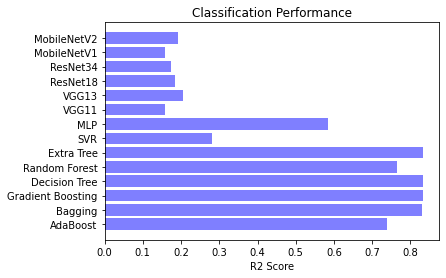

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()